In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [28]:
df = pd.read_csv('salary.csv')

In [29]:
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [30]:
df = pd.get_dummies(df,drop_first=True)

In [31]:
df

salary_more_then_100k  company_facebook  company_google  \
0                       0                 0               1   
1                       0                 0               1   
2                       1                 0               1   
3                       1                 0               1   
4                       0                 0               1   
5                       1                 0               1   
6                       0                 0               0   
7                       0                 0               0   
8                       0                 0               0   
9                       1                 0               0   
10                      1                 1               0   
11                      1                 1               0   
12                      1                 1               0   
13                      1                 1               0   
14                      1                 1               0   
15                      1                 1               0   

    job_computer programmer  job_sales executive  degree_masters  
0                         0                    1               0  
1                         0                    1               1  
2                         0                    0               0  
3                         0                    0               1  
4                         1                    0               0  
5                         1                    0               1  
6                         0                    1               1  
7                         1                    0               0  
8                         0                    0               0  
9                         0                    0               1  
10                        0                    1               0  
11                        0                    1               1  
12                        0                    0               0  
13                        0                    0               1  
14                        1                    0               0  
15                        1                    0               1

In [32]:
x = df.drop('salary_more_then_100k',axis=1)
y = df['salary_more_then_100k']

In [33]:
x

company_facebook  company_google  job_computer programmer  \
0                  0               1                        0   
1                  0               1                        0   
2                  0               1                        0   
3                  0               1                        0   
4                  0               1                        1   
5                  0               1                        1   
6                  0               0                        0   
7                  0               0                        1   
8                  0               0                        0   
9                  0               0                        0   
10                 1               0                        0   
11                 1               0                        0   
12                 1               0                        0   
13                 1               0                        0   
14                 1               0                        1   
15                 1               0                        1   

    job_sales executive  degree_masters  
0                     1               0  
1                     1               1  
2                     0               0  
3                     0               1  
4                     0               0  
5                     0               1  
6                     1               1  
7                     0               0  
8                     0               0  
9                     0               1  
10                    1               0  
11                    1               1  
12                    0               0  
13                    0               1  
14                    0               0  
15                    0               1

In [36]:
treeModel = DecisionTreeClassifier()
logModel = LogisticRegression()

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=101)

In [38]:
logModel.fit(xtrain,ytrain)
treeModel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [40]:
logpred = logModel.predict(xtest)
treepred = treeModel.predict(xtest)

In [41]:
print(f"Logistic Regression Accuracy:{accuracy_score(ytest,logpred)}\n")
print(f"Decision Tree Accuracy:{accuracy_score(ytest,treepred)}")

Logistic Regression Accuracy:0.5

Decision Tree Accuracy:0.75


Titanic Survival Dataset


In [75]:
tf = pd.read_csv("titanic.csv")

In [76]:
tf.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [77]:
tf = tf.drop(['PassengerId','Name','Parch','Ticket','Cabin','Embarked'],axis=1)
tf.head()

Survived  Pclass     Sex   Age  SibSp     Fare
0         0       3    male  22.0      1   7.2500
1         1       1  female  38.0      1  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      1  53.1000
4         0       3    male  35.0      0   8.0500

In [78]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


<AxesSubplot:xlabel='Age', ylabel='Survived'>

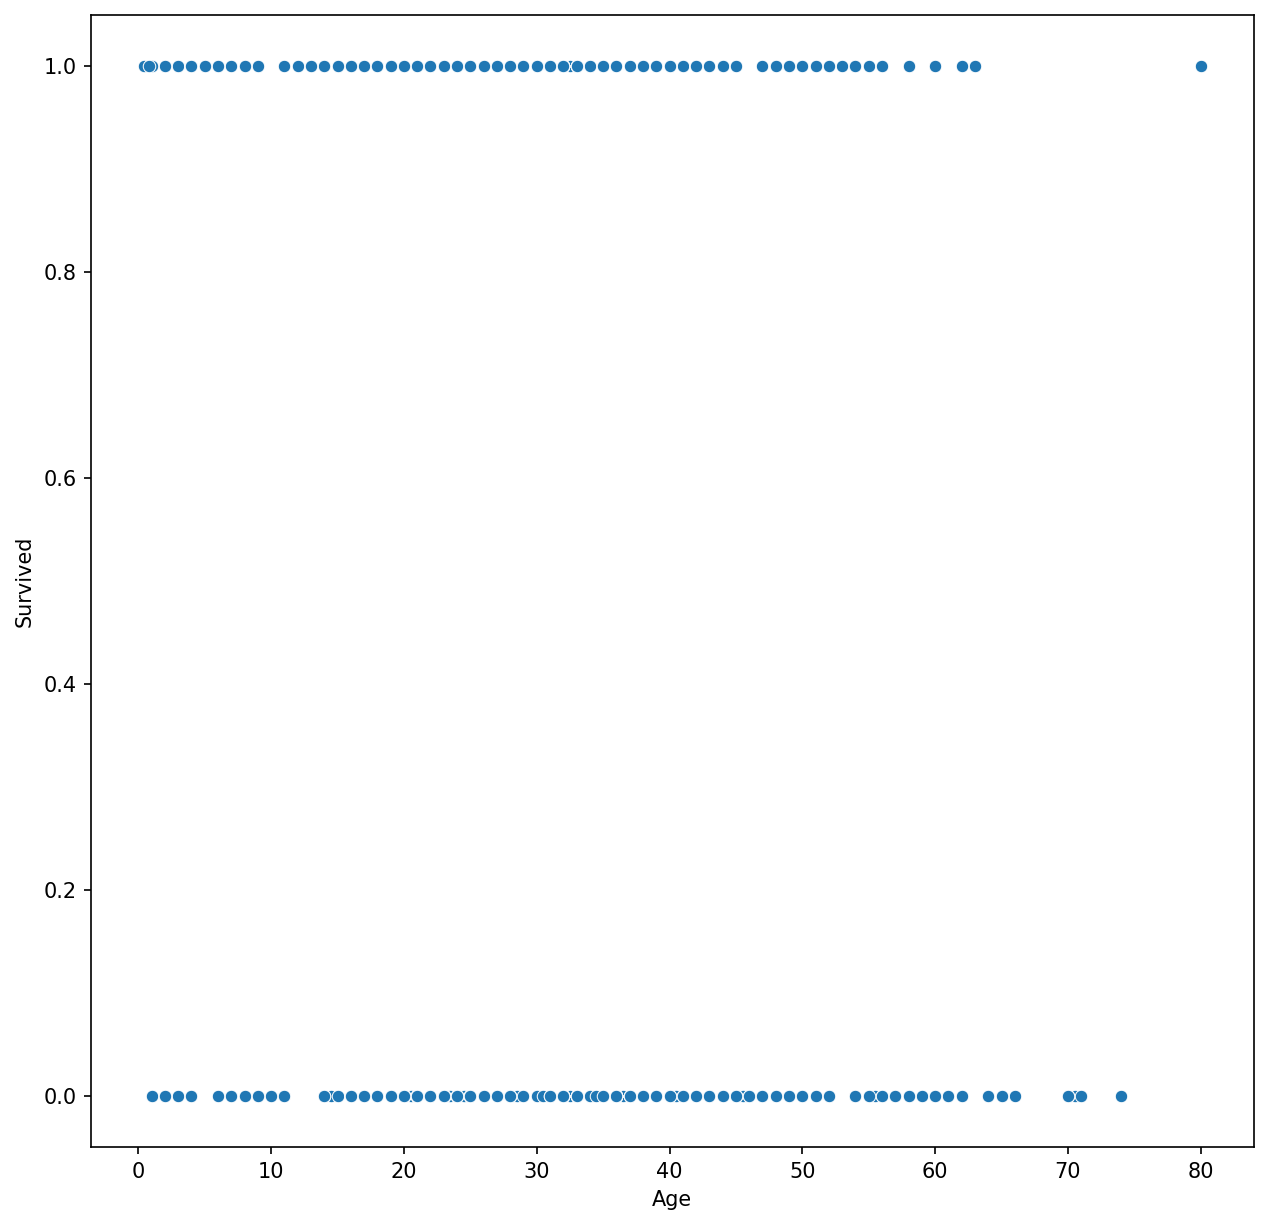

In [79]:
plt.figure(figsize=(10,10),dpi=150)
sns.scatterplot(data=tf,x='Age',y='Survived')

<AxesSubplot:>

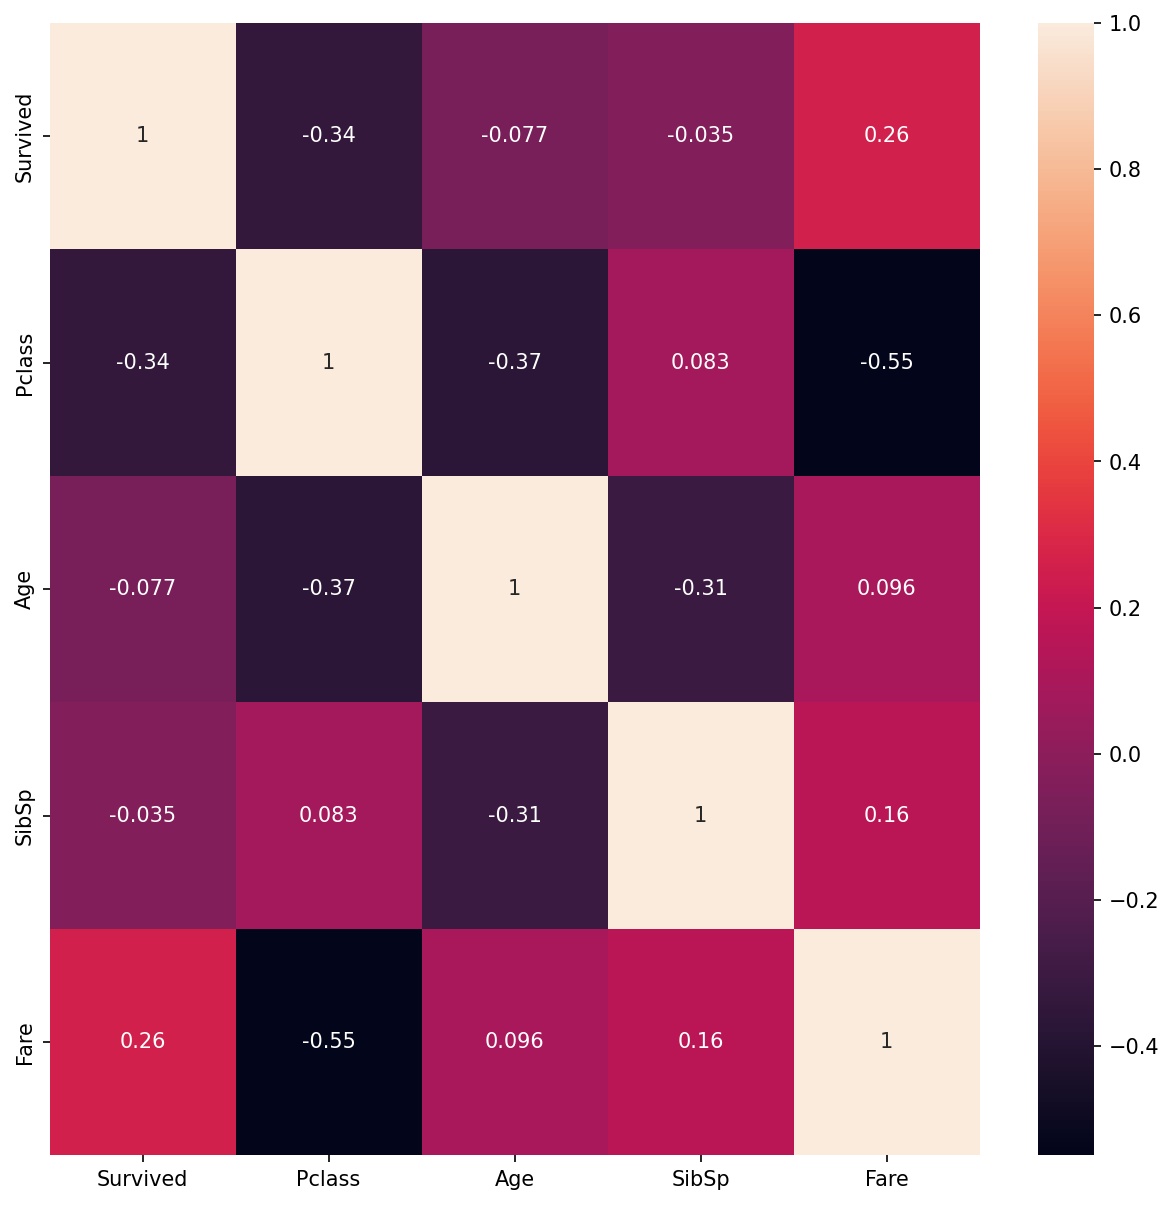

In [80]:
plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(tf.corr(),annot=True)

In [81]:
tf = pd.get_dummies(tf,drop_first=True)

In [82]:
tf

Survived  Pclass   Age  SibSp     Fare  Sex_male
0           0       3  22.0      1   7.2500         1
1           1       1  38.0      1  71.2833         0
2           1       3  26.0      0   7.9250         0
3           1       1  35.0      1  53.1000         0
4           0       3  35.0      0   8.0500         1
..        ...     ...   ...    ...      ...       ...
886         0       2  27.0      0  13.0000         1
887         1       1  19.0      0  30.0000         0
888         0       3   NaN      1  23.4500         0
889         1       1  26.0      0  30.0000         1
890         0       3  32.0      0   7.7500         1

[891 rows x 6 columns]

<AxesSubplot:>

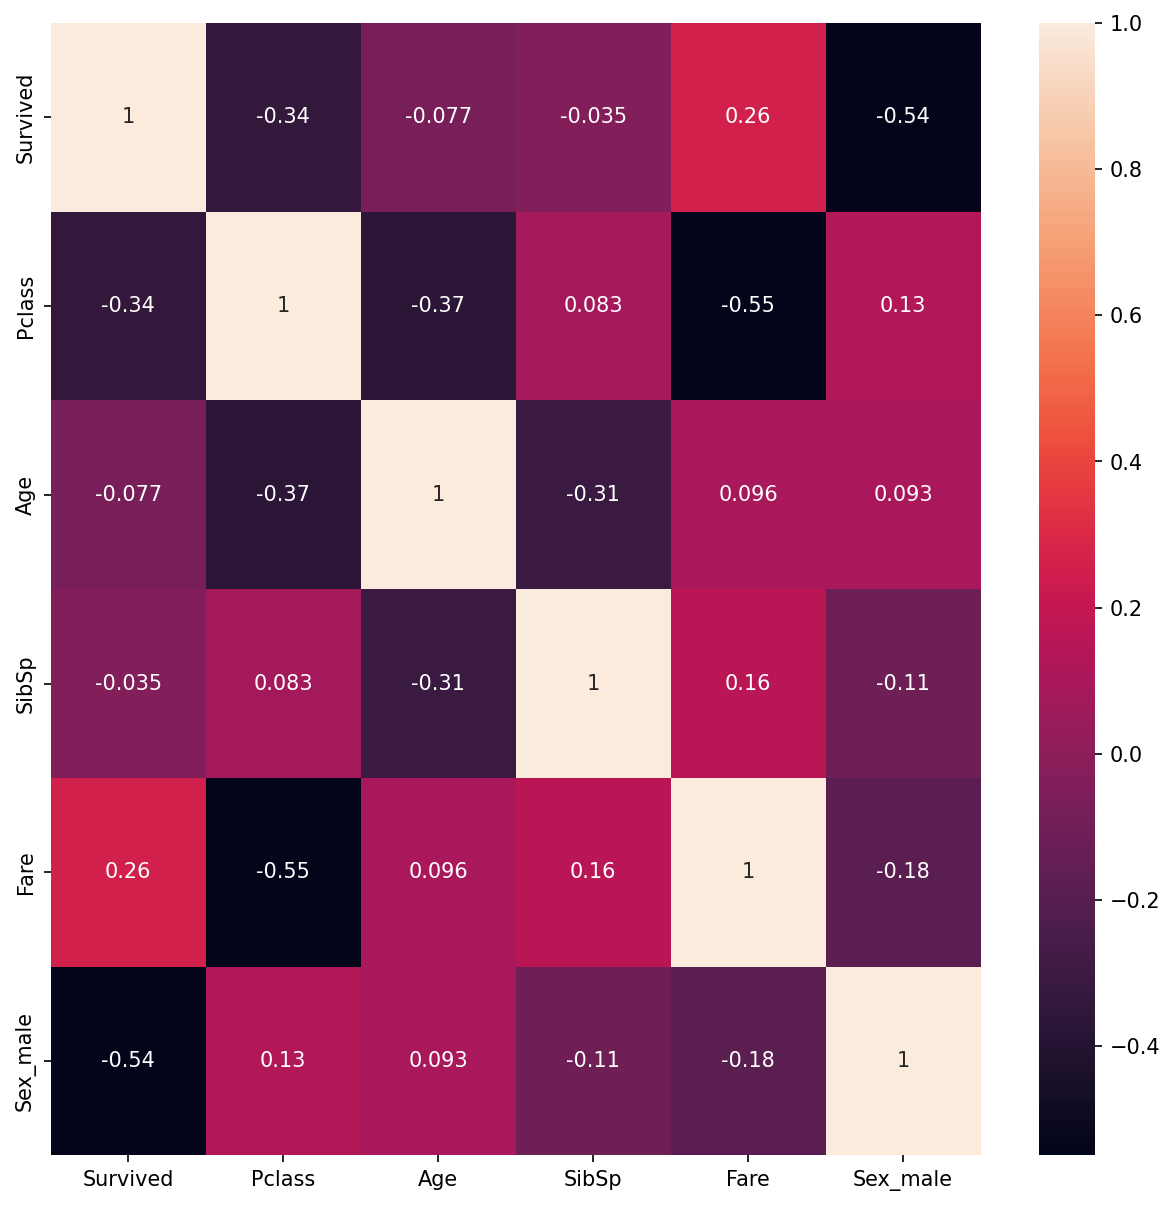

In [83]:
plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(tf.corr(),annot=True)

In [95]:
survivedLog = LogisticRegression()
survivedDT = DecisionTreeClassifier()

In [96]:
tf.isnull().sum()
tf = tf.fillna(tf['Age'].median())

In [97]:
tf.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Fare        0
Sex_male    0
dtype: int64

In [98]:
tx = tf.drop('Survived',axis=1) 
ty = tf['Survived']
txtrain, txtest, tytrain,tytest = train_test_split(tx,ty,test_size=0.2,random_state=101)
survivedDT.fit(txtrain,tytrain)
survivedLog.fit(txtrain,tytrain)

LogisticRegression()

In [99]:
tdtpred = survivedDT.predict(txtest)
tlogpred = survivedLog.predict(txtest)

In [100]:
print(f"Logistic Regression Accuracy:{accuracy_score(tytest,tlogpred)}\nDecisionTree Accuracy:{accuracy_score(tdtpred,tytest)}")

Logistic Regression Accuracy:0.8100558659217877
DecisionTree Accuracy:0.770949720670391
